In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Dataset/TON_IoT/train_test_network.csv")
data

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,192.168.1.32,48286,176.28.50.165,80,tcp,http,65.376610,2665,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211039,192.168.1.32,48288,176.28.50.165,80,tcp,http,65.710346,1987,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211040,192.168.1.32,48292,176.28.50.165,80,tcp,http,65.766512,3922,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211041,192.168.1.32,48294,176.28.50.165,80,tcp,http,65.753940,2401,322,S3,...,0,0,-,-,-,-,-,-,1,xss


In [5]:
data.shape

(211043, 44)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

In [7]:
missing_values = data.isnull().sum()


print("Missing values in each column:")
print(missing_values)

Missing values in each column:
src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
proto                     0
service                   0
duration                  0
src_bytes                 0
dst_bytes                 0
conn_state                0
missed_bytes              0
src_pkts                  0
src_ip_bytes              0
dst_pkts                  0
dst_ip_bytes              0
dns_query                 0
dns_qclass                0
dns_qtype                 0
dns_rcode                 0
dns_AA                    0
dns_RD                    0
dns_RA                    0
dns_rejected              0
ssl_version               0
ssl_cipher                0
ssl_resumed               0
ssl_established           0
ssl_subject               0
ssl_issuer                0
http_trans_depth          0
http_method               0
http_uri                  0
http_version              0
http_request_body_len     0
http_response_bod

In [8]:
import pandas as pd

label_distribution = data['label'].value_counts()
print("\nLabel class distribution:")
print(label_distribution)


Label class distribution:
label
1    161043
0     50000
Name: count, dtype: int64


In [9]:
duplicates = data.duplicated()
data[duplicates]

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
21,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000127,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
151,192.168.1.193,49194,192.168.1.33,8080,tcp,-,0.000019,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
322,192.168.1.193,49234,192.168.1.37,8080,tcp,-,0.000167,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
330,192.168.1.193,49234,192.168.1.37,8080,tcp,-,0.000163,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
348,192.168.1.193,49236,192.168.1.37,8080,tcp,-,0.000112,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211032,192.168.1.32,47514,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211033,192.168.1.32,47518,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211034,192.168.1.32,47634,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
211035,192.168.1.32,48134,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss


In [10]:
# Remove duplicate rows
data= data.drop_duplicates()

# Print the head of the cleaned dataset
data.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [12]:
from sklearn.preprocessing import LabelEncoder

# Identify the target variable
categorical_target = 'type'
binary_target = 'label'

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
if categorical_target in data.columns:
    data[categorical_target] = label_encoder.fit_transform(data[categorical_target])

# Apply label encoding to each categorical feature
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

<ipython-input-12-962e45c8297d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_target] = label_encoder.fit_transform(data[categorical_target])


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to numerical features excluding the target variables
features_to_scale = data.columns.difference([categorical_target, binary_target])
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


<ipython-input-13-4d1026bf1b5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, MultiHeadAttention, GlobalAveragePooling1D



# Assume 'binary_target' and 'multi_class_target' are the names of the target variables
X = data.drop(columns=['label', 'type'])
y_binary = data['label']
y_multi_class = data['type']

In [15]:
from sklearn.model_selection import train_test_split

# Assuming X, y_binary, and y_multi_class are already defined
X_train, X_test, y_train_binary, y_test_binary, y_train_multi_class, y_test_multi_class = train_test_split(
    X, y_binary, y_multi_class, test_size=0.2, random_state=42)

In [16]:
# Train-test split
X_train, X_test, y_train_binary, y_test_binary, y_train_multi_class, y_test_multi_class = train_test_split(
    X, y_binary, y_multi_class, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN 1D input
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

CNN+LSTM Preprocess

In [17]:
# Define the hybrid model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN for feature extraction
x = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.5)(x)

# LSTM for sequence modeling
x = LSTM(50, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)

# Shared Dense layers
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers for binary and multi-class classification
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)
multi_class_output = Dense(len(y_multi_class.unique()), activation='softmax', name='multi_class_output')(x)

# Define the model
model3 = Model(inputs=input_layer, outputs=[binary_output, multi_class_output])

In [18]:
# Compile the model
model3.compile(
    optimizer='adam',
    loss={'binary_output': 'binary_crossentropy', 'multi_class_output': 'sparse_categorical_crossentropy'},
    metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'}
)


In [19]:
# Train the model
model3.fit(
    X_train, {'binary_output': y_train_binary, 'multi_class_output': y_train_multi_class},
    epochs=5, batch_size=32, validation_split=0.2
)


Epoch 1/5
3810/3810 [==============================] - 77s 19ms/step - loss: 1.0116 - binary_output_loss: 0.1081 - multi_class_output_loss: 0.9034 - binary_output_accuracy: 0.9617 - multi_class_output_accuracy: 0.6677 - val_loss: 0.5607 - val_binary_output_loss: 0.0309 - val_multi_class_output_loss: 0.5298 - val_binary_output_accuracy: 0.9916 - val_multi_class_output_accuracy: 0.8051
Epoch 2/5
3810/3810 [==============================] - 69s 18ms/step - loss: 0.5717 - binary_output_loss: 0.0364 - multi_class_output_loss: 0.5352 - binary_output_accuracy: 0.9903 - multi_class_output_accuracy: 0.8093 - val_loss: 0.3920 - val_binary_output_loss: 0.0149 - val_multi_class_output_loss: 0.3771 - val_binary_output_accuracy: 0.9957 - val_multi_class_output_accuracy: 0.8574
Epoch 3/5
3810/3810 [==============================] - 71s 19ms/step - loss: 0.4566 - binary_output_loss: 0.0240 - multi_class_output_loss: 0.4326 - binary_output_accuracy: 0.9937 - multi_class_output_accuracy: 0.8443 - val_lo

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the test set
y_pred_binary, y_pred_multi_class = model3.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)
y_pred_multi_class = np.argmax(y_pred_multi_class, axis=1)

# Evaluate binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Evaluate multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi_class, y_pred_multi_class)
multi_class_precision = precision_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_recall = recall_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_f1 = f1_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_confusion_matrix = confusion_matrix(y_test_multi_class, y_pred_multi_class)

# Print binary classification metrics
print(f'Binary Classification:')
print(f'Accuracy: {binary_accuracy}')
print(f'Precision: {binary_precision}')
print(f'Recall: {binary_recall}')
print(f'F1 Score: {binary_f1}')
print(f'Confusion Matrix:\n{binary_confusion_matrix}')

# Print multi-class classification metrics
print(f'\nMulti-Class Classification:')
print(f'Accuracy: {multi_class_accuracy}')
print(f'Precision: {multi_class_precision}')
print(f'Recall: {multi_class_recall}')
print(f'F1 Score: {multi_class_f1}')
print(f'Confusion Matrix:\n{multi_class_confusion_matrix}')

# Store the metrics
metrics = {
    'Binary': {
        'Accuracy': binary_accuracy,
        'Precision': binary_precision,
        'Recall': binary_recall,
        'F1 Score': binary_f1
    },
    'Multi-Class': {
        'Accuracy': multi_class_accuracy,
        'Precision': multi_class_precision,
        'Recall': multi_class_recall,
        'F1 Score': multi_class_f1
    }
}


1191/1191 [==============================] - 8s 7ms/step
Binary Classification:
Accuracy: 0.99635122719517
Precision: 0.9978782878119422
Recall: 0.9974415942907157
F1 Score: 0.9976598932641964
Confusion Matrix:
[[ 8326    63]
 [   76 29630]]

Multi-Class Classification:
Accuracy: 0.8959443496521853
Precision: 0.9034395741063047
Recall: 0.8959443496521853
F1 Score: 0.8906578547295789
Confusion Matrix:
[[3675    0    1    4    0    2    0    1    2   29]
 [   0 3625   10   46    0   18  174    7   56   57]
 [   0   50 3555    4   10   21    0    2    0  114]
 [   0  148    6 1953    0    4 1659    0    7  301]
 [   0    3   82   28   25   26    0    0    0   46]
 [   1    4    2    5    0 8346    0   13    8   10]
 [   0    8   23  180    7    0 3627    0   83   20]
 [  49    0    0    0    0    9    0 2883    0    3]
 [   0  108   11   10    3    0   64  124 3738   14]
 [   0   76    1   56    0    1   28   99   26 2704]]


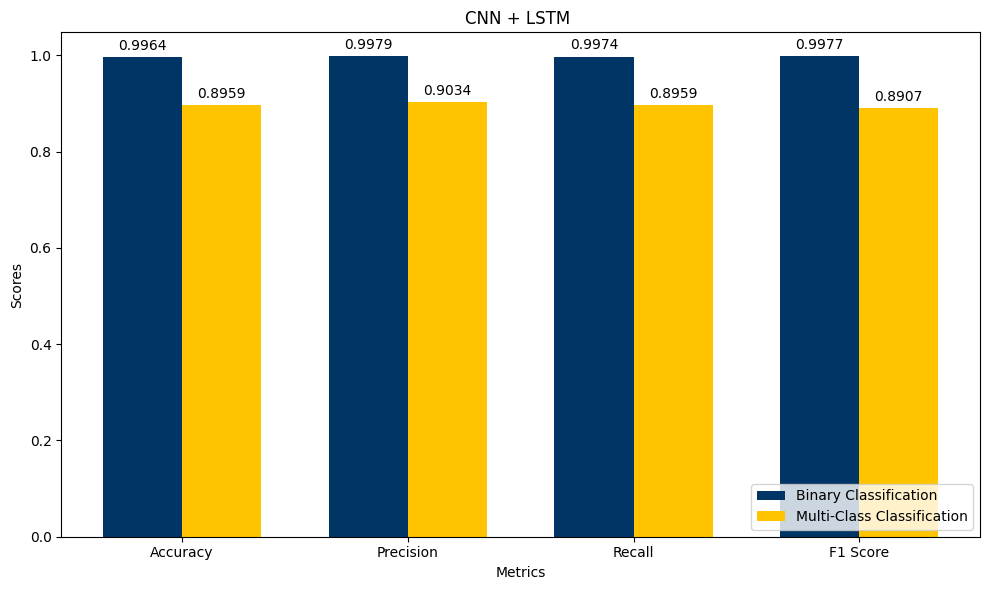

In [59]:
import matplotlib.pyplot as plt

# Plot the metrics
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
binary_values = [metrics['Binary'][cat] for cat in categories]
multi_class_values = [metrics['Multi-Class'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Adjust the size of the plot to a medium size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, binary_values, width, label='Binary Classification', color='#003566')
rects2 = ax.bar(x + width/2, multi_class_values, width, label='Multi-Class Classification', color='#ffc300')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('CNN + LSTM ')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend in the bottom right corner
ax.legend(loc='lower right')

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


CNN + BiLSTM Preprocess

In [23]:
# Define the hybrid model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN for feature extraction
x = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.5)(x)

# BiLSTM for sequence modeling
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = GlobalAveragePooling1D()(x)

# Shared Dense layers
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers for binary and multi-class classification
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)
multi_class_output = Dense(len(y_multi_class.unique()), activation='softmax', name='multi_class_output')(x)

# Define the model
model2 = Model(inputs=input_layer, outputs=[binary_output, multi_class_output])

In [24]:
# Compile the model
model2.compile(
    optimizer='adam',
    loss={'binary_output': 'binary_crossentropy', 'multi_class_output': 'sparse_categorical_crossentropy'},
    metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'}
)

In [25]:
# Train the model
model2.fit(
    X_train, {'binary_output': y_train_binary, 'multi_class_output': y_train_multi_class},
    epochs=8, batch_size=32, validation_split=0.2
)

Epoch 1/8
3810/3810 [==============================] - 114s 28ms/step - loss: 0.9884 - binary_output_loss: 0.0962 - multi_class_output_loss: 0.8922 - binary_output_accuracy: 0.9679 - multi_class_output_accuracy: 0.6740 - val_loss: 0.5722 - val_binary_output_loss: 0.0300 - val_multi_class_output_loss: 0.5421 - val_binary_output_accuracy: 0.9918 - val_multi_class_output_accuracy: 0.7929
Epoch 2/8
3810/3810 [==============================] - 107s 28ms/step - loss: 0.6076 - binary_output_loss: 0.0394 - multi_class_output_loss: 0.5681 - binary_output_accuracy: 0.9893 - multi_class_output_accuracy: 0.7931 - val_loss: 0.3868 - val_binary_output_loss: 0.0132 - val_multi_class_output_loss: 0.3737 - val_binary_output_accuracy: 0.9968 - val_multi_class_output_accuracy: 0.8613
Epoch 3/8
3810/3810 [==============================] - 109s 29ms/step - loss: 0.4538 - binary_output_loss: 0.0254 - multi_class_output_loss: 0.4284 - binary_output_accuracy: 0.9932 - multi_class_output_accuracy: 0.8426 - val

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the test set
y_pred_binary, y_pred_multi_class = model2.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)
y_pred_multi_class = np.argmax(y_pred_multi_class, axis=1)

# Evaluate binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Evaluate multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi_class, y_pred_multi_class)
multi_class_precision = precision_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_recall = recall_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_f1 = f1_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_confusion_matrix = confusion_matrix(y_test_multi_class, y_pred_multi_class)

# Print binary classification metrics
print(f'Binary Classification:')
print(f'Accuracy: {binary_accuracy}')
print(f'Precision: {binary_precision}')
print(f'Recall: {binary_recall}')
print(f'F1 Score: {binary_f1}')
print(f'Confusion Matrix:\n{binary_confusion_matrix}')

# Print multi-class classification metrics
print(f'\nMulti-Class Classification:')
print(f'Accuracy: {multi_class_accuracy}')
print(f'Precision: {multi_class_precision}')
print(f'Recall: {multi_class_recall}')
print(f'F1 Score: {multi_class_f1}')
print(f'Confusion Matrix:\n{multi_class_confusion_matrix}')

# Store the metrics
metrics = {
    'Binary': {
        'Accuracy': binary_accuracy,
        'Precision': binary_precision,
        'Recall': binary_recall,
        'F1 Score': binary_f1
    },
    'Multi-Class': {
        'Accuracy': multi_class_accuracy,
        'Precision': multi_class_precision,
        'Recall': multi_class_recall,
        'F1 Score': multi_class_f1
    }
}


1191/1191 [==============================] - 8s 7ms/step
Binary Classification:
Accuracy: 0.9982149888436803
Precision: 0.9985533575561836
Recall: 0.9991584191745775
F1 Score: 0.9988557967356554
Confusion Matrix:
[[ 8346    43]
 [   25 29681]]

Multi-Class Classification:
Accuracy: 0.9072844205276283
Precision: 0.9143329468432556
Recall: 0.9072844205276283
F1 Score: 0.9053985202719559
Confusion Matrix:
[[3678    2    3    0    4    0    0    0    0   27]
 [   0 3675   12   72    5    2   93   40   16   78]
 [   0   26 3571    2   15    2    0    0    0  140]
 [   0  127    3 2366    3    4 1378    3    4  190]
 [   0    2   84    3   58   22    0    0    0   41]
 [   2    1    2    0    9 8356    0    3    7    9]
 [   0    8   23  218   14    0 3645    1   14   25]
 [   8    0    0    0    0    2    0 2893   10   31]
 [   0   62    9    0   15    0  186  156 3569   75]
 [   0   40    4  103    0    0   32   15   45 2752]]


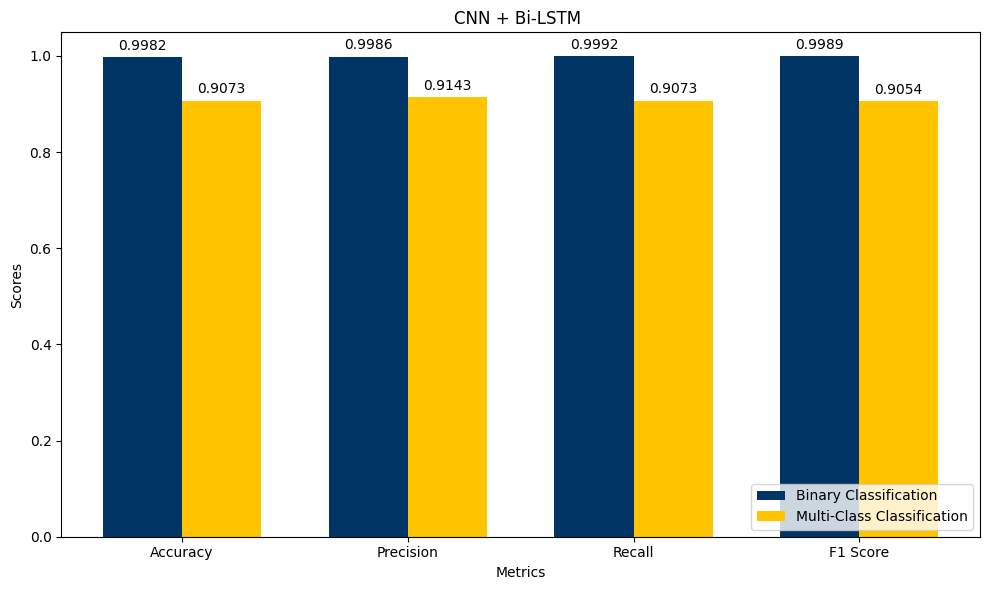

In [61]:
import matplotlib.pyplot as plt

# Plot the metrics
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
binary_values = [metrics['Binary'][cat] for cat in categories]
multi_class_values = [metrics['Multi-Class'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Adjust the size of the plot to a medium size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, binary_values, width, label='Binary Classification', color='#003566')
rects2 = ax.bar(x + width/2, multi_class_values, width, label='Multi-Class Classification', color='#ffc300')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('CNN + Bi-LSTM ')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend in the bottom right corner
ax.legend(loc='lower right')

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


CNN + GRU Preprocessing

In [28]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU, GlobalAveragePooling1D

In [29]:
# Define the hybrid model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN for feature extraction
x = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.5)(x)

# GRU for sequence modeling
x = GRU(50, return_sequences=True)(x)
x = GlobalAveragePooling1D()(x)

# Shared Dense layers
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers for binary and multi-class classification
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)
multi_class_output = Dense(len(y_multi_class.unique()), activation='softmax', name='multi_class_output')(x)

# Define the model
model4 = Model(inputs=input_layer, outputs=[binary_output, multi_class_output])

In [30]:
# Compile the model
model4.compile(
    optimizer='adam',
    loss={'binary_output': 'binary_crossentropy', 'multi_class_output': 'sparse_categorical_crossentropy'},
    metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'}
)

In [31]:
# Train the model
model4.fit(
    X_train, {'binary_output': y_train_binary, 'multi_class_output': y_train_multi_class},
    epochs=5, batch_size=32, validation_split=0.2
)


Epoch 1/5
3810/3810 [==============================] - 85s 21ms/step - loss: 1.0424 - binary_output_loss: 0.1063 - multi_class_output_loss: 0.9361 - binary_output_accuracy: 0.9633 - multi_class_output_accuracy: 0.6637 - val_loss: 0.5335 - val_binary_output_loss: 0.0226 - val_multi_class_output_loss: 0.5109 - val_binary_output_accuracy: 0.9947 - val_multi_class_output_accuracy: 0.8256
Epoch 2/5
3810/3810 [==============================] - 73s 19ms/step - loss: 0.5621 - binary_output_loss: 0.0302 - multi_class_output_loss: 0.5320 - binary_output_accuracy: 0.9924 - multi_class_output_accuracy: 0.8124 - val_loss: 0.3481 - val_binary_output_loss: 0.0105 - val_multi_class_output_loss: 0.3376 - val_binary_output_accuracy: 0.9967 - val_multi_class_output_accuracy: 0.8752
Epoch 3/5
3810/3810 [==============================] - 79s 21ms/step - loss: 0.4438 - binary_output_loss: 0.0219 - multi_class_output_loss: 0.4220 - binary_output_accuracy: 0.9946 - multi_class_output_accuracy: 0.8500 - val_lo

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the test set
y_pred_binary, y_pred_multi_class = model4.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)
y_pred_multi_class = np.argmax(y_pred_multi_class, axis=1)

# Evaluate binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Evaluate multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi_class, y_pred_multi_class)
multi_class_precision = precision_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_recall = recall_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_f1 = f1_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_confusion_matrix = confusion_matrix(y_test_multi_class, y_pred_multi_class)

# Print binary classification metrics
print(f'Binary Classification:')
print(f'Accuracy: {binary_accuracy}')
print(f'Precision: {binary_precision}')
print(f'Recall: {binary_recall}')
print(f'F1 Score: {binary_f1}')
print(f'Confusion Matrix:\n{binary_confusion_matrix}')

# Print multi-class classification metrics
print(f'\nMulti-Class Classification:')
print(f'Accuracy: {multi_class_accuracy}')
print(f'Precision: {multi_class_precision}')
print(f'Recall: {multi_class_recall}')
print(f'F1 Score: {multi_class_f1}')
print(f'Confusion Matrix:\n{multi_class_confusion_matrix}')

# Store the metrics
metrics = {
    'Binary': {
        'Accuracy': binary_accuracy,
        'Precision': binary_precision,
        'Recall': binary_recall,
        'F1 Score': binary_f1
    },
    'Multi-Class': {
        'Accuracy': multi_class_accuracy,
        'Precision': multi_class_precision,
        'Recall': multi_class_recall,
        'F1 Score': multi_class_f1
    }
}


1191/1191 [==============================] - 6s 5ms/step
Binary Classification:
Accuracy: 0.9977949862186639
Precision: 0.998317744431734
Recall: 0.9988554500774255
F1 Score: 0.9985865248704314
Confusion Matrix:
[[ 8339    50]
 [   34 29672]]

Multi-Class Classification:
Accuracy: 0.9093844336527104
Precision: 0.9151836946124174
Recall: 0.9093844336527104
F1 Score: 0.9061144602491025
Confusion Matrix:
[[3676    1    0    3    0    3    0    2    0   29]
 [   0 3648   28  104    1   13  142    0   40   17]
 [   0   49 3651    6   11    2    0    0    1   36]
 [   5  104   92 2208    0   10 1546    0    7  106]
 [   0    3   64   22   38   19    0    0    0   64]
 [   2    0    6    6    3 8353    0    1    8   10]
 [   0    2   34  245   14    0 3623    0   22    8]
 [  63    0    1    0    0    4    0 2866    5    5]
 [   7  100   12    3   10    0  121   34 3770   15]
 [   0   52    3   14    0    1   18   47   46 2810]]


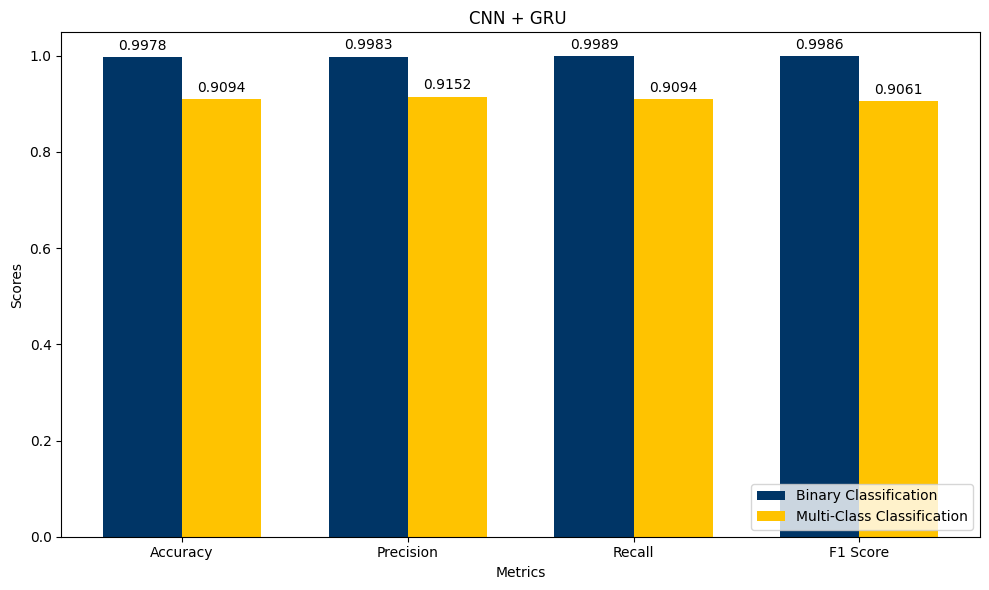

In [63]:
import matplotlib.pyplot as plt

# Plot the metrics
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
binary_values = [metrics['Binary'][cat] for cat in categories]
multi_class_values = [metrics['Multi-Class'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Adjust the size of the plot to a medium size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, binary_values, width, label='Binary Classification', color='#003566')
rects2 = ax.bar(x + width/2, multi_class_values, width, label='Multi-Class Classification', color='#ffc300')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('CNN + GRU ')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend in the bottom right corner
ax.legend(loc='lower right')

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

CNN + Bi-GRU Preprocess

In [34]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, GRU, GlobalAveragePooling1D

In [35]:
# Define the hybrid model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# CNN for feature extraction
x = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.5)(x)

# Bidirectional GRU for sequence modeling
x = Bidirectional(GRU(50, return_sequences=True))(x)
x = GlobalAveragePooling1D()(x)

# Shared Dense layers
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers for binary and multi-class classification
binary_output = Dense(1, activation='sigmoid', name='binary_output')(x)
multi_class_output = Dense(len(y_multi_class.unique()), activation='softmax', name='multi_class_output')(x)

# Define the model
model5 = Model(inputs=input_layer, outputs=[binary_output, multi_class_output])

In [36]:
# Compile the model
model5.compile(
    optimizer='adam',
    loss={'binary_output': 'binary_crossentropy', 'multi_class_output': 'sparse_categorical_crossentropy'},
    metrics={'binary_output': 'accuracy', 'multi_class_output': 'accuracy'}
)


In [37]:
# Train the model
model5.fit(
    X_train, {'binary_output': y_train_binary, 'multi_class_output': y_train_multi_class},
    epochs=8, batch_size=32, validation_split=0.2
)


Epoch 1/8
3810/3810 [==============================] - 126s 31ms/step - loss: 0.9804 - binary_output_loss: 0.0964 - multi_class_output_loss: 0.8840 - binary_output_accuracy: 0.9659 - multi_class_output_accuracy: 0.6829 - val_loss: 0.4797 - val_binary_output_loss: 0.0150 - val_multi_class_output_loss: 0.4646 - val_binary_output_accuracy: 0.9961 - val_multi_class_output_accuracy: 0.8065
Epoch 2/8
3810/3810 [==============================] - 118s 31ms/step - loss: 0.4917 - binary_output_loss: 0.0254 - multi_class_output_loss: 0.4663 - binary_output_accuracy: 0.9940 - multi_class_output_accuracy: 0.8364 - val_loss: 0.2859 - val_binary_output_loss: 0.0099 - val_multi_class_output_loss: 0.2760 - val_binary_output_accuracy: 0.9971 - val_multi_class_output_accuracy: 0.9111
Epoch 3/8
3810/3810 [==============================] - 112s 29ms/step - loss: 0.3733 - binary_output_loss: 0.0190 - multi_class_output_loss: 0.3544 - binary_output_accuracy: 0.9956 - multi_class_output_accuracy: 0.8793 - val

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the test set
y_pred_binary, y_pred_multi_class = model5.predict(X_test)
y_pred_binary = (y_pred_binary > 0.5).astype(int)
y_pred_multi_class = np.argmax(y_pred_multi_class, axis=1)

# Evaluate binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Evaluate multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi_class, y_pred_multi_class)
multi_class_precision = precision_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_recall = recall_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_f1 = f1_score(y_test_multi_class, y_pred_multi_class, average='weighted')
multi_class_confusion_matrix = confusion_matrix(y_test_multi_class, y_pred_multi_class)

# Print binary classification metrics
print(f'Binary Classification:')
print(f'Accuracy: {binary_accuracy}')
print(f'Precision: {binary_precision}')
print(f'Recall: {binary_recall}')
print(f'F1 Score: {binary_f1}')
print(f'Confusion Matrix:\n{binary_confusion_matrix}')

# Print multi-class classification metrics
print(f'\nMulti-Class Classification:')
print(f'Accuracy: {multi_class_accuracy}')
print(f'Precision: {multi_class_precision}')
print(f'Recall: {multi_class_recall}')
print(f'F1 Score: {multi_class_f1}')
print(f'Confusion Matrix:\n{multi_class_confusion_matrix}')

# Store the metrics
metrics = {
    'Binary': {
        'Accuracy': binary_accuracy,
        'Precision': binary_precision,
        'Recall': binary_recall,
        'F1 Score': binary_f1
    },
    'Multi-Class': {
        'Accuracy': multi_class_accuracy,
        'Precision': multi_class_precision,
        'Recall': multi_class_recall,
        'F1 Score': multi_class_f1
    }
}

1191/1191 [==============================] - 8s 7ms/step
Binary Classification:
Accuracy: 0.9983462396639979
Precision: 0.9986542408236047
Recall: 0.9992257456406113
F1 Score: 0.998939911491023
Confusion Matrix:
[[ 8349    40]
 [   23 29683]]

Multi-Class Classification:
Accuracy: 0.9423283895524347
Precision: 0.9444259570064162
Recall: 0.9423283895524347
F1 Score: 0.9410675657475991
Confusion Matrix:
[[3704    0    0    0    0    4    4    1    0    1]
 [   0 3833   12   68    1    6    4    2   30   37]
 [   0   46 3571    2   16    1    1    0    0  119]
 [   0  104    3 3009    0    4  787    0    6  165]
 [   0    3   78    2   60   23    2    0    0   42]
 [   0    2    1    0    8 8356    1    8    6    7]
 [   0    5   23   92   14    0 3777    0   18   19]
 [   6    0    0    0    0    4    0 2930    0    4]
 [   0   94    9    2   13    0  106    1 3812   35]
 [   0   30    0   52    0    0    3   25   35 2846]]


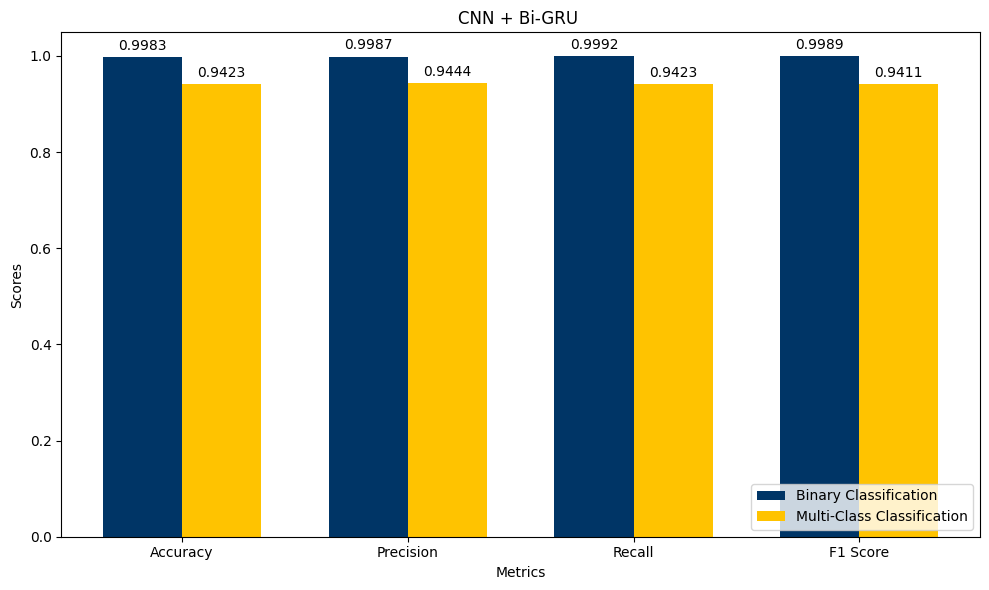

In [65]:
import matplotlib.pyplot as plt

# Plot the metrics
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
binary_values = [metrics['Binary'][cat] for cat in categories]
multi_class_values = [metrics['Multi-Class'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Adjust the size of the plot to a medium size
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, binary_values, width, label='Binary Classification', color='#003566')
rects2 = ax.bar(x + width/2, multi_class_values, width, label='Multi-Class Classification', color='#ffc300')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('CNN + Bi-GRU ')
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Place the legend in the bottom right corner
ax.legend(loc='lower right')

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()